Paket opendatasets digunakan untuk mengunduh dataset dari berbagai sumber seperti Kaggle dengan mudah.

In [38]:
!pip install opendatasets

1. Import Library
- ast, numpy, pandas: Untuk manipulasi data dan operasi numerik.
- matplotlib.pyplot, seaborn: Untuk visualisasi data.
- opendatasets: Untuk mengunduh dataset dari sumber online.
- sklearn.feature_extraction.text.CountVectorizer, sklearn.metrics.pairwise.cosine_similarity: Untuk ekstraksi fitur teks dan menghitung kesamaan kosinus dalam Content-Based Filtering.
- math.sqrt, scipy.sparse, sklearn.model_selection.KFold, sklearn.metrics.mean_squared_error, scipy.sparse.linalg.- svds: Untuk operasi matematika, manipulasi matriks sparse, dan evaluasi model dalam Collaborative Filtering.
- sklearn.model_selection.train_test_split, keras.layers.Input, keras.layers.Dense, keras.models.Model: Untuk membangun dan melatih model neural network dalam Neural Network Recommendation System.
- sklearn.preprocessing.MinMaxScaler: Untuk normalisasi data.
- from sklearn.metrics import mean_squared_error: menghitung MSE
- from math import sqrt: mengambil square root function

In [39]:
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from math import sqrt
import scipy.sparse as sparse
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from scipy.sparse.linalg import svds

from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model

from sklearn.metrics import f1_score, precision_score, recall_score
from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

Mengunduh dataset dari Kaggle menggunakan pustaka opendatasets, kemudian membaca file CSV yang berisi data rating film ke dalam DataFrame Pandas, dan menampilkan lima baris pertama dari DataFrame tersebut.

In [40]:
"""local
ratings = pd.read_csv('ratings.csv')
"""

od.download('https://www.kaggle.com/datasets/shubhammehta21/movie-lens-small-latest-dataset')
ratings = pd.read_csv('/content/movie-lens-small-latest-dataset/ratings.csv')
ratings.head()

Skipping, found downloaded files in "./movie-lens-small-latest-dataset" (use force=True to force download)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Melihat jumlah kolom dan baris rating shape.

In [41]:
ratings.shape

(100836, 4)

Mengunduh dataset dari Kaggle menggunakan pustaka opendatasets, kemudian membaca file CSV yang berisi data film ke dalam DataFrame Pandas. Dataset diunduh dari URL yang diberikan, dan file movies.csv dibaca ke dalam DataFrame movies.

In [42]:
od.download('https://www.kaggle.com/datasets/shubhammehta21/movie-lens-small-latest-dataset?select=movies.csv')
movies = pd.read_csv('/content/movie-lens-small-latest-dataset/movies.csv')

Skipping, found downloaded files in "./movie-lens-small-latest-dataset" (use force=True to force download)


Melihat 5 data movie pertama

In [43]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Melihat jumlah kolom dan baris dari data movies.

In [44]:
movies.shape

(9742, 3)

menggabungkan dua DataFrame, ratings dan movies, berdasarkan kolom movieId menggunakan metode join kiri (left join). Hasil penggabungan ini disimpan dalam DataFrame baru bernama movie_ratings, kemudian lima baris pertama dari DataFrame movie_ratings ditampilkan.

In [45]:
movie_ratings = pd.merge(ratings, movies, on='movieId', how='left')

movie_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


Melihat jumlah kolom dan baris movie_ratings yang sudah digabung

In [46]:
movie_ratings.shape

(100836, 6)

EDA untuk melihat distribusi rating film dalam dataset.

Fungsi dari EDA ini adalah untuk memvisualisasikan distribusi rating film dalam dataset. Dengan melihat histogram ini, kita dapat memahami bagaimana rating tersebar, apakah ada rating yang lebih umum, dan apakah distribusi rating mendekati distribusi normal atau tidak. Garis KDE (Kernel Density Estimate) membantu melihat distribusi data secara lebih halus. Frekuensi condong ke rating 3.0 - 4.0

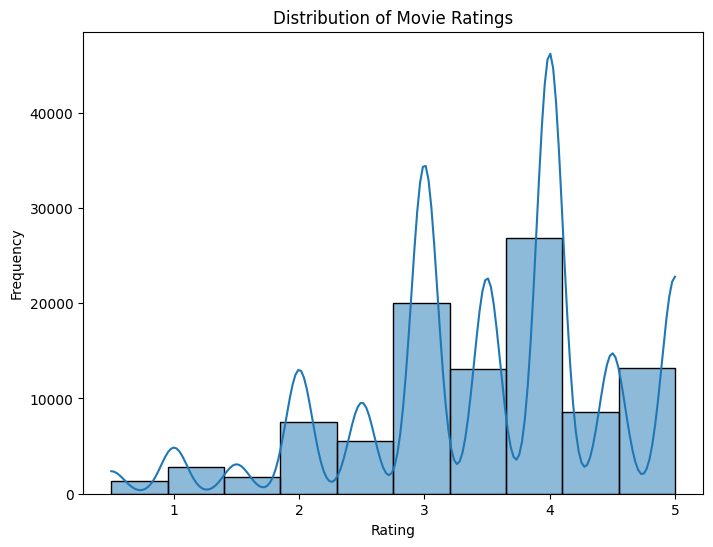

In [47]:
plt.figure(figsize=(8, 6))
sns.histplot(movie_ratings['rating'], bins=10, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Melihat distribusi movie genre.

Fungsi dari EDA ini adalah untuk memvisualisasikan distribusi genre film dalam dataset. Dengan memisahkan genre yang digabungkan dalam satu kolom dan menghitung jumlah kemunculan setiap genre, kita dapat memahami genre apa yang paling umum dalam dataset. Plot batang ini membantu melihat secara visual berapa banyak film yang termasuk dalam setiap genre.

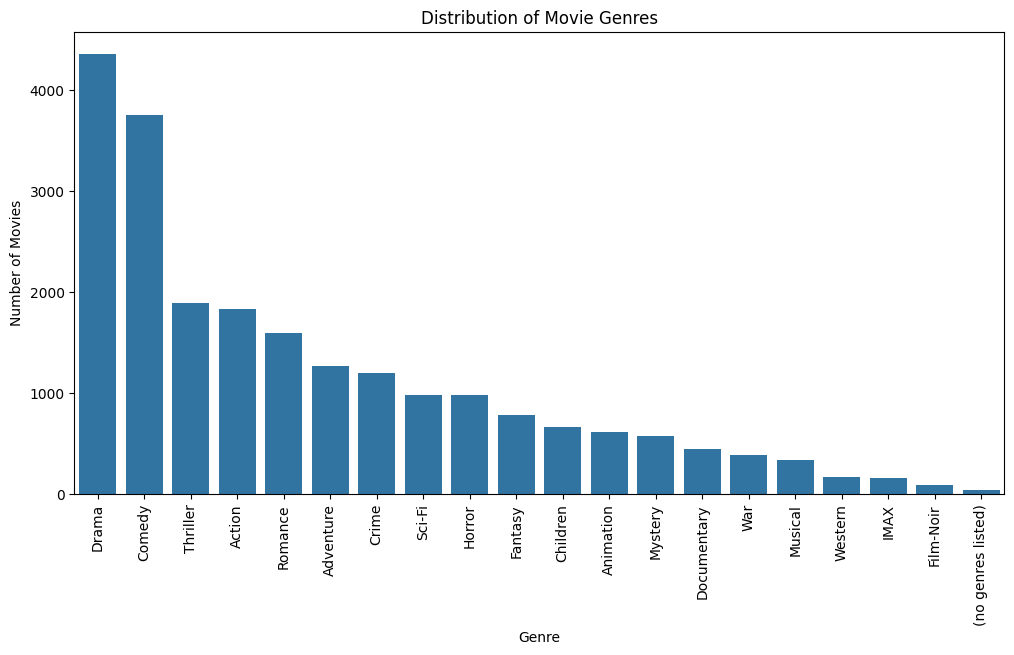

In [48]:
movies_exploded = movies.assign(genres=movies['genres'].str.split('|')).explode('genres')

genre_counts = movies_exploded['genres'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Genres')
plt.show()

EDA melihat distribusi rata-rata rating film yang diberikan setiap user.

Fungsi dari EDA ini adalah untuk memvisualisasikan distribusi rata-rata rating yang diberikan oleh setiap pengguna. Dengan melihat histogram ini, kita dapat memahami bagaimana pengguna memberikan rating secara keseluruhan, apakah ada kecenderungan pengguna memberikan rating tinggi atau rendah, dan apakah distribusi rating mendekati distribusi normal atau tidak. Garis KDE (Kernel Density Estimate) membantu melihat distribusi data secara lebih halus. Distribusi rating condong ke range 3.5 - 4.0

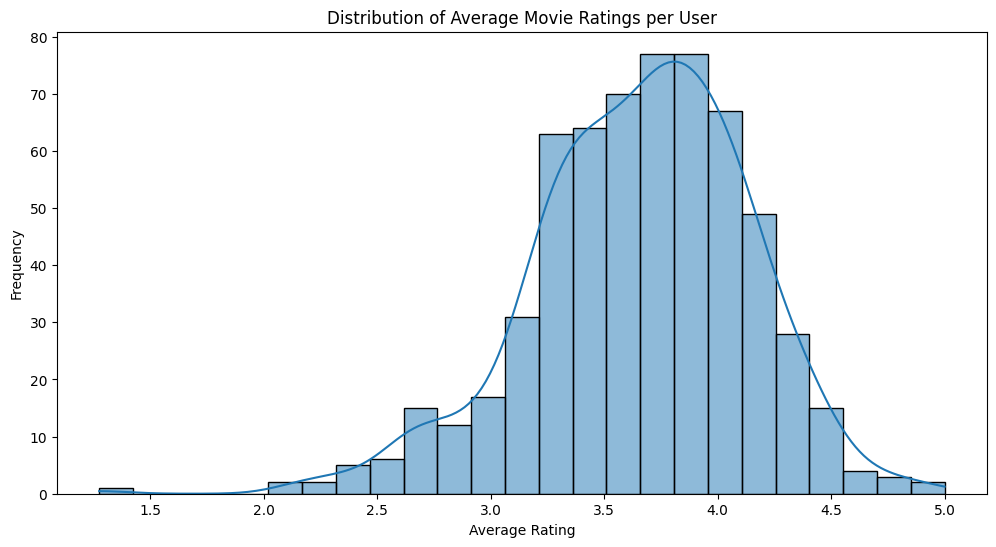

In [49]:
plt.figure(figsize=(12, 6))
sns.histplot(movie_ratings.groupby('userId')['rating'].mean(), kde=True)
plt.title('Distribution of Average Movie Ratings per User')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()


Kode ini menghitung jumlah nilai yang hilang (missing values) di setiap kolom DataFrame movie ratings.

In [50]:
movie_ratings.isna().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0
title,0
genres,0


Menghitung data duplikat di setiap kolom DataFrame

In [51]:
movie_ratings.duplicated().sum()

0

Memeriksa outlier dalam dataset movie_ratings menggunakan dua metode: Interquartile Range (IQR) dan Z-score

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

Outliers (using IQR):
        userId  movieId  rating   timestamp  \
205          1     3176     1.0   964983504   
261          3       31     0.5  1306463578   
262          3      527     0.5  1306464275   
263          3      647     0.5  1306463619   
264          3      688     0.5  1306464228   
...        ...      ...     ...         ...   
100374     610    68319     1.0  1493845505   
100415     610    72424     0.5  1493849030   
100426     610    74075     1.0  1493848880   
100734     610   120635     1.0  1493850489   
100797     610   145951     0.5  1493849019   

                                     title                       genres  
205        Talented Mr. Ripley, The (1999)       Drama|Mystery|Thriller  
261                 Dangerous Minds (1995)         

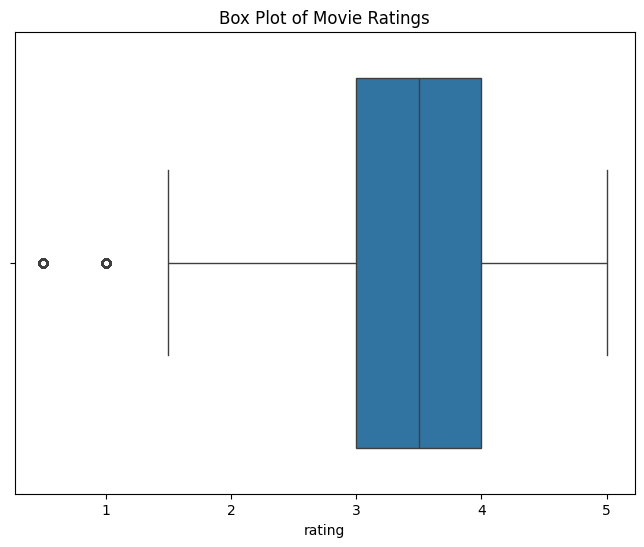


Outliers (using Z-score):


,userId,movieId,rating,timestamp,title,genres


In [52]:
rating_stats = movie_ratings['rating'].describe()
print(rating_stats)

Q1 = movie_ratings['rating'].quantile(0.25)
Q3 = movie_ratings['rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = movie_ratings[(movie_ratings['rating'] < lower_bound) | (movie_ratings['rating'] > upper_bound)]
print("\nOutliers (using IQR):")
print(outliers)


plt.figure(figsize=(8, 6))
sns.boxplot(x='rating', data=movie_ratings)
plt.title('Box Plot of Movie Ratings')
plt.show()

z = np.abs(stats.zscore(movie_ratings['rating']))
outliers_zscore = movie_ratings[(z > 3)]  # Typically, Z-score > 3 or < -3 are considered outliers
print("\nOutliers (using Z-score):")
outliers_zscore

## Content-Based Filtering

Membuat salinan dari DataFrame movies dan menyimpannya dalam variabel movies_cb_filtering. Variabel ini akan digunakan untuk filtering berbasis konten (content-based filtering).

In [53]:
movies_cb_filtering = movies.copy()

Fungsi convert_text ini mengonversi teks yang berisi beberapa item yang dipisahkan oleh tanda | menjadi daftar item. Jika input bukan string, fungsi ini mengembalikan daftar kosong.

In [54]:
def convert_text(text):
    if isinstance(text, str):
        L = []
        for i in text.split('|'):
            L.append(i)
        return L
    else:
        return []

Menerapkan fungsi convert_text pada kolom genres dari DataFrame movies_cb_filtering. Setiap nilai dalam kolom genres akan diubah dari string yang dipisahkan oleh tanda | menjadi daftar item.

In [55]:
movies_cb_filtering['genres'] = movies_cb_filtering['genres'].apply(convert_text)

Melihat data setelah di convert text

In [56]:
movies_cb_filtering

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]"
9738,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]"
9739,193585,Flint (2017),[Drama]
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]"


Fungsi clean_text ini membersihkan teks dengan mengubah semua huruf menjadi huruf kecil dan menghapus spasi. Jika input adalah daftar, fungsi ini akan membersihkan setiap elemen dalam daftar. Jika input adalah string, fungsi ini akan membersihkan string tersebut. Jika input bukan string atau daftar, fungsi ini akan mengembalikan string kosong.

In [57]:
def clean_text(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]

    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))

        else:
            return ''

 Menerapkan fungsi clean_text pada kolom title dan genres dari DataFrame movies_cb_filtering. Setiap nilai dalam kolom tersebut akan dibersihkan dengan mengubah semua huruf menjadi huruf kecil dan menghapus spasi.

In [58]:
features = ['title','genres']

for feature in features:
    movies_cb_filtering[feature] = movies_cb_filtering[feature].apply(clean_text)

 Menggabungkan nilai dari kolom title dan genres menjadi satu string. Kolom genres yang berisi daftar genre akan digabungkan menjadi satu string dengan spasi sebagai pemisah.

In [59]:
def create_soup(x):
    return x['title'] + ' ' + ' '.join(x['genres'])

Menerapkan fungsi create_soup pada setiap baris DataFrame movies_cb_filtering untuk membuat kolom baru bernama soup. Kolom soup akan berisi string gabungan dari kolom title dan genres.

In [60]:
movies_cb_filtering['soup'] = movies_cb_filtering.apply(create_soup, axis=1)

Melihat kolom soup

In [61]:
movies_cb_filtering.head()

,movieId,title,genres,soup
0,1,toystory(1995),"[adventure, animation, children, comedy, fantasy]",toystory(1995) adventure animation children co...
1,2,jumanji(1995),"[adventure, children, fantasy]",jumanji(1995) adventure children fantasy
2,3,grumpieroldmen(1995),"[comedy, romance]",grumpieroldmen(1995) comedy romance
3,4,waitingtoexhale(1995),"[comedy, drama, romance]",waitingtoexhale(1995) comedy drama romance
4,5,fatherofthebridepartii(1995),[comedy],fatherofthebridepartii(1995) comedy


menggunakan CountVectorizer dari pustaka scikit-learn untuk mengubah teks dalam kolom soup menjadi matriks fitur berbasis frekuensi kata. CountVectorizer menghapus kata-kata umum (stop words) dalam bahasa Inggris sebelum membuat matriks fitur.

In [62]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(movies_cb_filtering['soup'])

Menghitung kesamaan kosinus antara semua pasangan film dalam DataFrame movies_cb_filtering menggunakan matriks fitur yang dihasilkan oleh CountVectorizer. Kesamaan kosinus mengukur seberapa mirip dua dokumen (dalam hal ini, dua film) berdasarkan frekuensi kata dalam teks gabungan mereka.

In [63]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)

cosine_sim

array([[1.        , 0.6761234 , 0.37796447, ..., 0.        , 0.16903085,
        0.18898224],
       [0.6761234 , 1.        , 0.2236068 , ..., 0.        , 0.        ,
        0.        ],
       [0.37796447, 0.2236068 , 1.        , ..., 0.        , 0.        ,
        0.25      ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.16903085, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.18898224, 0.        , 0.25      , ..., 0.        , 0.        ,
        1.        ]])

Menggunakan MinMaxScaler dari pustaka scikit-learn untuk menormalkan nilai dalam matriks kesamaan kosinus (cosine_sim) ke dalam rentang [0, 1]. Normalisasi ini dapat membantu dalam membandingkan nilai kesamaan secara lebih konsisten.

In [64]:
scaler = MinMaxScaler()
cosine_sim_normalized = scaler.fit_transform(cosine_sim)

cosine_sim_normalized

array([[1.        , 0.6761234 , 0.37796447, ..., 0.        , 0.16903085,
        0.18898224],
       [0.6761234 , 1.        , 0.2236068 , ..., 0.        , 0.        ,
        0.        ],
       [0.37796447, 0.2236068 , 1.        , ..., 0.        , 0.        ,
        0.25      ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.16903085, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.18898224, 0.        , 0.25      , ..., 0.        , 0.        ,
        1.        ]])

Memastikan bahwa DataFrame movies_cb_filtering memiliki indeks yang bersih dan berurutan, serta membuat Series indices yang memungkinkan pencarian cepat indeks film berdasarkan judulnya. Ini sangat berguna untuk algoritma rekomendasi, di mana kita perlu menemukan indeks film berdasarkan judul untuk menghitung kesamaan dan memberikan rekomendasi.

In [65]:
movies_cb_filtering = movies_cb_filtering.reset_index(drop = True)
indices = pd.Series(movies_cb_filtering.index, index=movies_cb_filtering['title'])

Untuk membuat rekomendasi berbasis TF-IDF dan mengevaluasi kesamaan kosinus dari 10 film teratas, kita perlu menggunakan TfidfVectorizer dari pustaka scikit-learn. Berikut adalah langkah-langkah untuk membuat rekomendasi berbasis TF-IDF dan mengevaluasi kesamaan kosinus:

Menggunakan TfidfVectorizer untuk mengubah teks dalam kolom soup menjadi matriks fitur berbasis TF-IDF.
Menghitung kesamaan kosinus antara semua pasangan film.
Membuat fungsi get_recommendations untuk mendapatkan rekomendasi film berdasarkan judul yang diberikan.
Mengevaluasi kesamaan kosinus dari 10 film teratas.

In [66]:
def get_recommendations(title, cosine_sim=cosine_sim_normalized):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim_normalized[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    # Return the similarity scores along with recommended movies
    similarity_scores = [i[1] for i in sim_scores]  # Extract similarity scores
    return movies_cb_filtering['title'].iloc[movie_indices], similarity_scores, movies_cb_filtering['genres'].iloc[movie_indices]  # Return similarity scores

movie_title = "toystory(1995)"
recommendations, similarity_scores, recommended_genres = get_recommendations(movie_title)  # Get similarity scores

print(f"Top 10 recommendations for '{movie_title}':")
for i, (movie, score) in enumerate(zip(recommendations, similarity_scores)):
    print(f"{i+1}. {movie} (Similarity Score: {score:.4f})")  # Format similarity scores

Top 10 recommendations for 'toystory(1995)':
1. antz(1998) (Similarity Score: 0.7143)
2. toystory2(1999) (Similarity Score: 0.7143)
3. adventuresofrockyandbullwinkle,the(2000) (Similarity Score: 0.7143)
4. monsters,inc.(2001) (Similarity Score: 0.7143)
5. wild,the(2006) (Similarity Score: 0.7143)
6. shrekthethird(2007) (Similarity Score: 0.7143)
7. taleofdespereaux,the(2008) (Similarity Score: 0.7143)
8. turbo(2013) (Similarity Score: 0.7143)
9. thegooddinosaur(2015) (Similarity Score: 0.7143)
10. moana(2016) (Similarity Score: 0.7143)


1. Fungsi get_recommendations telah diperbarui untuk mengembalikan genre dari film yang direkomendasikan.
2. Fungsi evaluate_recommendations mengevaluasi rekomendasi berdasarkan genre menggunakan metrik F1 score, precision, dan recall.
3. y_true diisi dengan nilai 1 untuk setiap rekomendasi, mengasumsikan bahwa semua rekomendasi relevan untuk evaluasi ini.
4. y_pred diisi dengan nilai 1 jika ada genre dalam rekomendasi yang cocok dengan genre asli, dan 0 jika tidak.
5. Metrik F1 score, precision, dan recall dihitung dan ditampilkan.

In [67]:
def evaluate_recommendations(movie_title):
    recommendations, similarity_scores, recommended_genres = get_recommendations(movie_title) # Changed order

    actual_genres = movies_cb_filtering[movies_cb_filtering['title'] == movie_title]['genres'].iloc[0]

    actual_genres_set = set(actual_genres)

    y_true = []
    y_pred = []

    for genres in recommended_genres:
        genres_set = set(genres)
        y_pred.append(1 if len(actual_genres_set.intersection(genres_set))>0 else 0)
        y_true.append(1)

    f1 = f1_score(y_true, y_pred, average='binary')
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')


    print(f"Evaluation for '{movie_title}':")
    print(f"F1 Score: {f1}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")

movie_title = "toystory(1995)"
evaluate_recommendations(movie_title)

movie_title = "streetfighter(1994)"
evaluate_recommendations(movie_title)

Evaluation for 'toystory(1995)':
F1 Score: 1.0
Precision: 1.0
Recall: 1.0
Evaluation for 'streetfighter(1994)':
F1 Score: 1.0
Precision: 1.0
Recall: 1.0


## Collaborative Filtering

1. Membaca data rating dari file CSV dan membuat matriks pivot R dengan userId sebagai indeks, movieId sebagai kolom, dan rating sebagai nilai.
2. Membuat objek KFold untuk melakukan cross-validation dengan 5 lipatan.
3. Mendefinisikan fungsi predict_rating untuk memprediksi rating berdasarkan matriks yang direkonstruksi.
4. Dalam loop cross-validation, membagi data menjadi data latih (R_train) dan data uji (R_test).
5. Membuat matriks sparse dari data latih dan melakukan SVD dengan k=50.
6. Mereconstruct matriks dari hasil SVD.
7. Menghitung perbedaan antara data uji dan matriks yang direkonstruksi, kemudian menghitung RMSE dan mencetak hasilnya.

In [68]:
R = ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)

kf = KFold(n_splits=5)

def predict_rating(userId, movieId, R, reconstructed):
    if userId in R.index and movieId in R.columns:
        row = R.index.get_loc(userId)
        col = R.columns.get_loc(movieId)
        return reconstructed[row, col]
    return np.mean(R.values)

for train_index, test_index in kf.split(R):
    R_train = R.iloc[train_index, :]
    R_test = R.iloc[test_index, :]

    train_matrix = sparse.csr_matrix(R_train.values)
    U, sigma, Vt = svds(train_matrix, k=50)
    sigma = np.diag(sigma)
    reconstructed = np.dot(np.dot(U, sigma), Vt)

    diff = R_test.values - reconstructed[:len(R_test), :]
    rmse = sqrt(mean_squared_error(R_test.values.flatten(), diff.flatten()))
    print("RMSE:", rmse)

RMSE: 0.3278482636400103
RMSE: 0.3604249317785623
RMSE: 0.36217149842210794
RMSE: 0.36426126759722716
RMSE: 0.3647826863204736


1. Fungsi get_user_recommendations mendapatkan film yang belum diberi rating oleh pengguna dan memprediksi rating untuk film-film tersebut menggunakan matriks yang direkonstruksi.
2. Film yang diprediksi dengan rating tertinggi diurutkan dan 10 film teratas direkomendasikan.
3. Memuat file movies.csv untuk mendapatkan judul film dari ID film yang direkomendasikan.
4. Mendapatkan 5 film dengan rating tertinggi yang diberikan oleh pengguna dan mencetaknya.
5. Mencetak film yang direkomendasikan beserta judulnya.

In [69]:
def get_user_recommendations(userId, R, reconstructed, top_n=10):
    user_ratings = R.loc[userId]
    user_unrated_movies = user_ratings[user_ratings == 0].index
    predicted_ratings = {movieId: predict_rating(userId, movieId, R, reconstructed) for movieId in user_unrated_movies}
    recommended_movies = sorted(predicted_ratings.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return recommended_movies

user_id = 28
recommended_movies = get_user_recommendations(user_id, R, reconstructed)

""" local
movies = pd.read_csv("movies.csv")
"""

recommended_movie_ids = [movie[0] for movie in recommended_movies]
recommended_movies_with_titles = movies[movies['movieId'].isin(recommended_movie_ids)]

top_5_highest_rated = R.loc[user_id].sort_values(ascending=False).head(5)

print(f"User ID: {user_id}")
print("Top 5 Highest Rated Movies:")
for movie_id in top_5_highest_rated.index:
    movie_title = movies[movies['movieId'] == movie_id]['title'].values[0]
    print(f"{movie_title} - Rating: {top_5_highest_rated[movie_id]}")

print("Recommended Movies:")
for row in recommended_movies_with_titles.itertuples():
    print(row.title)

User ID: 28
Top 5 Highest Rated Movies:
Dune (1984) - Rating: 5.0
Dune (2000) - Rating: 5.0
Once (2006) - Rating: 5.0
Avatar (2009) - Rating: 5.0
Batman Begins (2005) - Rating: 4.5
Recommended Movies:
Carlito's Way (1993)
Platoon (1986)
Chinatown (1974)
Three Kings (1999)
Mulholland Drive (2001)
Ocean's Eleven (2001)
Adaptation (2002)
Illusionist, The (2006)
Pan's Labyrinth (Laberinto del fauno, El) (2006)
Hurt Locker, The (2008)


## Neural Network Reccomendation Systems

Membaca data rating dari file CSV, membuat matriks pivot dari DataFrame df_nn, dan mengonversinya menjadi array NumPy.

In [70]:
df_nn = pd.read_csv('/content/movie-lens-small-latest-dataset/ratings.csv')

user_movie = df_nn.pivot(index='userId', columns='movieId', values='rating').fillna(0)

user_movie = user_movie.to_numpy()
user_movie

array([[4. , 0. , 4. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [2.5, 2. , 2. , ..., 0. , 0. , 0. ],
       [3. , 0. , 0. , ..., 0. , 0. , 0. ],
       [5. , 0. , 0. , ..., 0. , 0. , 0. ]])

Meakukan normalisasi data user_movie

In [71]:
scaler = MinMaxScaler(feature_range = (0,1))

user_movie_matrix = scaler.fit_transform(user_movie)

Melakukan train test split pada data user_movie

In [72]:
x_train , x_test = train_test_split(user_movie_matrix, test_size=0.2, random_state=42)

1. Membuat lapisan input dengan bentuk sesuai dengan jumlah kolom dalam matriks user_movie.
2. Menambahkan lapisan tersembunyi (hidden layers) untuk encoding dan decoding.
3. Membuat model autoencoder dan mengompilasinya dengan optimizer adam dan loss function binary_crossentropy.

In [73]:
# Input layer of the model
input_layer = Input(shape=(user_movie_matrix.shape[1],))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
output_layer = Dense(user_movie.shape[1], activation='sigmoid')(decoded)

# Create the autoencoder model
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

1. Melatih model autoencoder menggunakan data pelatihan dan data validasi.
2. Menentukan jumlah epoch, ukuran batch, dan pengacakan data.

In [74]:
autoencoder.fit(x_train,x_train,
               epochs=50,
               batch_size=256,
               shuffle=True,
               validation_data=(x_test,x_test))

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 0.6929 - val_loss: 0.6902
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 587ms/step - loss: 0.6896 - val_loss: 0.6774
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 462ms/step - loss: 0.6775 - val_loss: 0.6426
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 486ms/step - loss: 0.6475 - val_loss: 0.5811
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 370ms/step - loss: 0.5953 - val_loss: 0.5030
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 418ms/step - loss: 0.5218 - val_loss: 0.4285
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 468ms/step - loss: 0.4433 - val_loss: 0.3735
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - loss: 0.3646 - val_loss: 0.3445
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 0.3071 - val_loss: 0.3377
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - loss: 0.2517 - val_loss: 0.3482
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 0.2361 - val_loss: 0.3614
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 0.2121 - val_loss:

1. Menggunakan model autoencoder untuk memprediksi rating film untuk semua pengguna.
2. Memuat file movies.csv untuk mendapatkan informasi tentang film.
3. Membuat peta user_id_to_index untuk memetakan userId ke indeks yang benar dalam matriks user_movie_matrix.
4. Mendefinisikan fungsi get_recommendations_with_titles untuk mendapatkan rekomendasi film beserta judulnya untuk pengguna tertentu.
5. Menggunakan fungsi tersebut untuk mendapatkan rekomendasi film untuk pengguna dengan ID tertentu.
Mencetak hasil rekomendasi.

In [75]:
user_predictions = autoencoder.predict(user_movie_matrix)

movies = pd.read_csv('/content/movie-lens-small-latest-dataset/movies.csv')

user_id_to_index = {user_id: index for index, user_id in enumerate(df_nn['userId'].unique())}

# Recommendation function for user (with movie names)
def get_recommendations_with_titles(user_id, user_predictions, top_n=10):
    user_index = user_id_to_index[user_id]

    watched_movies = np.where(user_movie_matrix[user_index] > 0)[0]
    predicted_scores = user_predictions[user_index]

    recommended_movies = [
        (movie, predicted_scores[movie]) for movie in np.argsort(-predicted_scores)
        if movie not in watched_movies
    ]

    recommended_movies = recommended_movies[:top_n]

    recommended_movie_ids = [movie[0] for movie in recommended_movies]
    scores = [movie[1] for movie in recommended_movies]

    recommended_movies_with_titles = movies[movies['movieId'].isin(recommended_movie_ids)]
    recommended_movies_with_titles = recommended_movies_with_titles.copy()  #
    recommended_movies_with_titles['score'] = scores[:len(recommended_movies_with_titles)]
    return recommended_movies_with_titles[['movieId', 'title', 'score']]

user_id = 28
recommendations_with_titles = get_recommendations_with_titles(user_id, user_predictions)

print(recommendations_with_titles)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
      movieId                            title     score
647       835                   Foxfire (1996)  0.689839
739       963    Inspector General, The (1949)  0.680656
741       968  Night of the Living Dead (1968)  0.642944
1645     2194         Untouchables, The (1987)  0.626392
2403     3189               My Dog Skip (1999)  0.562783


menghitung Root Mean Squared Error (RMSE) untuk model autoencoder pada data test.

In [79]:
user_predictions_test = autoencoder.predict(x_test)
user_predictions_original = scaler.inverse_transform(user_predictions_test)
x_test_original = scaler.inverse_transform(x_test)

rmse = sqrt(mean_squared_error(x_test_original, user_predictions_original))
print(f"RMSE for Neural Network: {rmse}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
RMSE for Neural Network: 0.6224545783886474
